# Potato Leaf Disease Classification using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 25

In [3]:
# loads images from the specified directory

ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Plant Village",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = ds.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(ds) 
#total is 68 X 32(batches)

68

In [6]:
train_size = 0.8
len(ds)*train_size  #out of 68

54.400000000000006

In [7]:
train_ds = ds.take(54)  #takes first 54 images
len(train_ds)

54

In [8]:
test_ds = ds.skip(54)  #skips first 54 images
len(test_ds)

14

In [9]:
val_size = 0.1
len(ds)*val_size

6.800000000000001

In [10]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [12]:
# Dataset Partitioning

def ds_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    train_ds = ds.take(train_size)
    
    val_size = int(val_split * ds_size)
    val_ds = ds.skip(train_size).take(val_size)
    
    test_size = int(test_split * ds_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = ds_partition(ds)

In [14]:
len(train_ds)

54

In [15]:
len(test_ds)

8

In [16]:
len(val_ds)

6

In [17]:

"""
Caches: data will be loaded once and kept in memory, making subsequent epochs faster as the data does not need to be read
from disk again.

Shuffles the data to ensure randomness and robustness in training.

Prefetches: Allows the data pipeline to fetch data while the model is training data.
To efficiently manage data loading and processing, reducing bottlenecks.
"""

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [18]:
# Resizes image once the testing is done and if needed

resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [19]:
# Generates images like horizontal flip, vert flip, contrast etc from the provided image

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [35]:

# Define input shape
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# Trial and Error
model = models.Sequential([
    # Input layer with specified shape
    layers.Input(shape=input_shape),
    
    # Preprocessing
    resize_rescale,
    data_augmentation,
    
    # First Convolutional Layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    
    # First Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Converts the 2D matrix data to a 1D vector to be used by the dense layers.
    layers.Flatten(),
    
    # Fully connected layer with 64 units.
    layers.Dense(64, activation='relu'),
    
    # Fully connected layer with a number of units equal to the number of classes.
    layers.Dense(n_classes, activation='softmax'),
])



In [36]:
# Print the model summary to verify the architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# prepares the model for training by configuring the optimizer, loss function, and evaluation metrics

model.compile(
    # used to update the model's weights during training
    optimizer = "adam",
    
    # Loss Function
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    
    # The accuracy metric will be used to evaluate the model's performance.
    metrics = ["accuracy"]
)

In [23]:
# Training the model

history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    
    # verbose: This parameter controls the verbosity of the training process.
    # A value of 1 means that progress will be displayed in the form of a progress bar.
    verbose = 1,
    
    # used to evaluate the model at the end of each epoch, which helps in monitoring the model’s performance
    # on unseen data during the training process
    validation_data = val_ds
)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.4636 - loss: 0.9354 - val_accuracy: 0.7031 - val_loss: 0.7653
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6712 - loss: 0.7316 - val_accuracy: 0.7969 - val_loss: 0.4753
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7634 - loss: 0.5248 - val_accuracy: 0.8750 - val_loss: 0.3094
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8584 - loss: 0.3538 - val_accuracy: 0.8125 - val_loss: 0.3778
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8919 - loss: 0.2699 - val_accuracy: 0.8125 - val_loss: 0.3978
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8930 - loss: 0.2730 - val_accuracy: 0.9219 - val_loss: 0.2125
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8887 - loss: 0.2811 - val_accuracy: 0.8750 - val_loss: 0.2619
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9064 - loss: 0.2266 - val_accuracy: 0.9271 - val_loss:

In [24]:
score = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.9736 - loss: 0.0435


In [25]:
# Loss and Accuracy
score

[0.04363759607076645, 0.97265625]

In [26]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 54}

In [27]:
# provides the names of the metrics recorded during training
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [28]:
# This variable is assigned the list of accuracy values recorded during training for each epoch.
acc = history.history["accuracy"]
#print(acc)


#This variable is assigned the list of accuracy values recorded during validation for each epoch.
val_acc = history.history["val_accuracy"]


# extracts the list of loss values from the history.history dictionary, which were recorded after each epoch during training
loss = history.history['loss']

# extracts the list of loss values from the history.history dictionary, which were recorded after each epoch during validation
val_loss = history.history['val_loss']

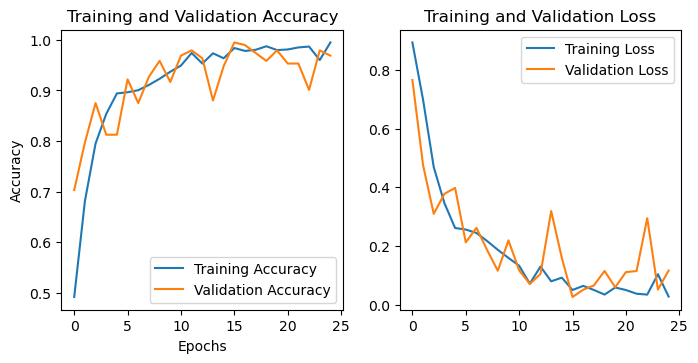

In [29]:
# creates a new figure with a size of 8x8 inches
plt.figure(figsize=(8, 8))

# creates a subplot in a 1x2 grid (one row and two columns), and it places the current plot in the first position (left side)
plt.subplot(2, 2, 1)

#  plots the training accuracy values (acc) against the range of epochs 
plt.plot(range(EPOCHS), acc, label='Training Accuracy')

# lots the validation accuracy values (val_acc) against the range of epochs
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')


# Specifies the name of each line
plt.legend(loc='lower right')
plt.xlabel('Epochs')  # X-axis label for accuracy plot
plt.ylabel('Accuracy')  # Y-axis label for accuracy plot
plt.title('Training and Validation Accuracy')


plt.subplot(2, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image: AxesImage(size=(256, 256))
Actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
Predicted Label:  Potato___Early_blight


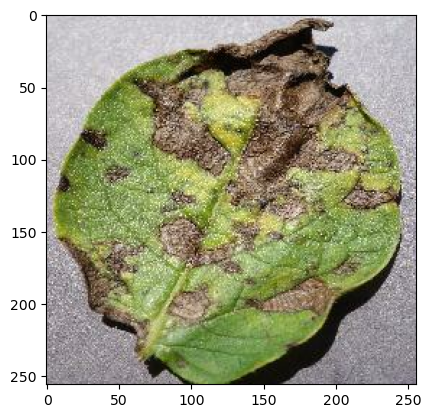

In [30]:
import numpy as np

for images_batch,labels_batch in test_ds.take(1):
    
    first_image = plt.imshow(images_batch[0].numpy().astype("uint8"))
    
    first_label = labels_batch[0].numpy()
    
    print(f"First Image: {first_image}")
    print(f"Actual label: {class_names[first_label]}")
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])

In [31]:
def predict(model, img):
    # Converts the input image into a NumPy array
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    # required because the model expects a batch of images as input
    img_array = tf.expand_dims(img_array, 0)

    # Uses the trained model to predict the class probabilities for the input image
    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    # Converts this probability into a percentage and rounds it to two decimal places
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


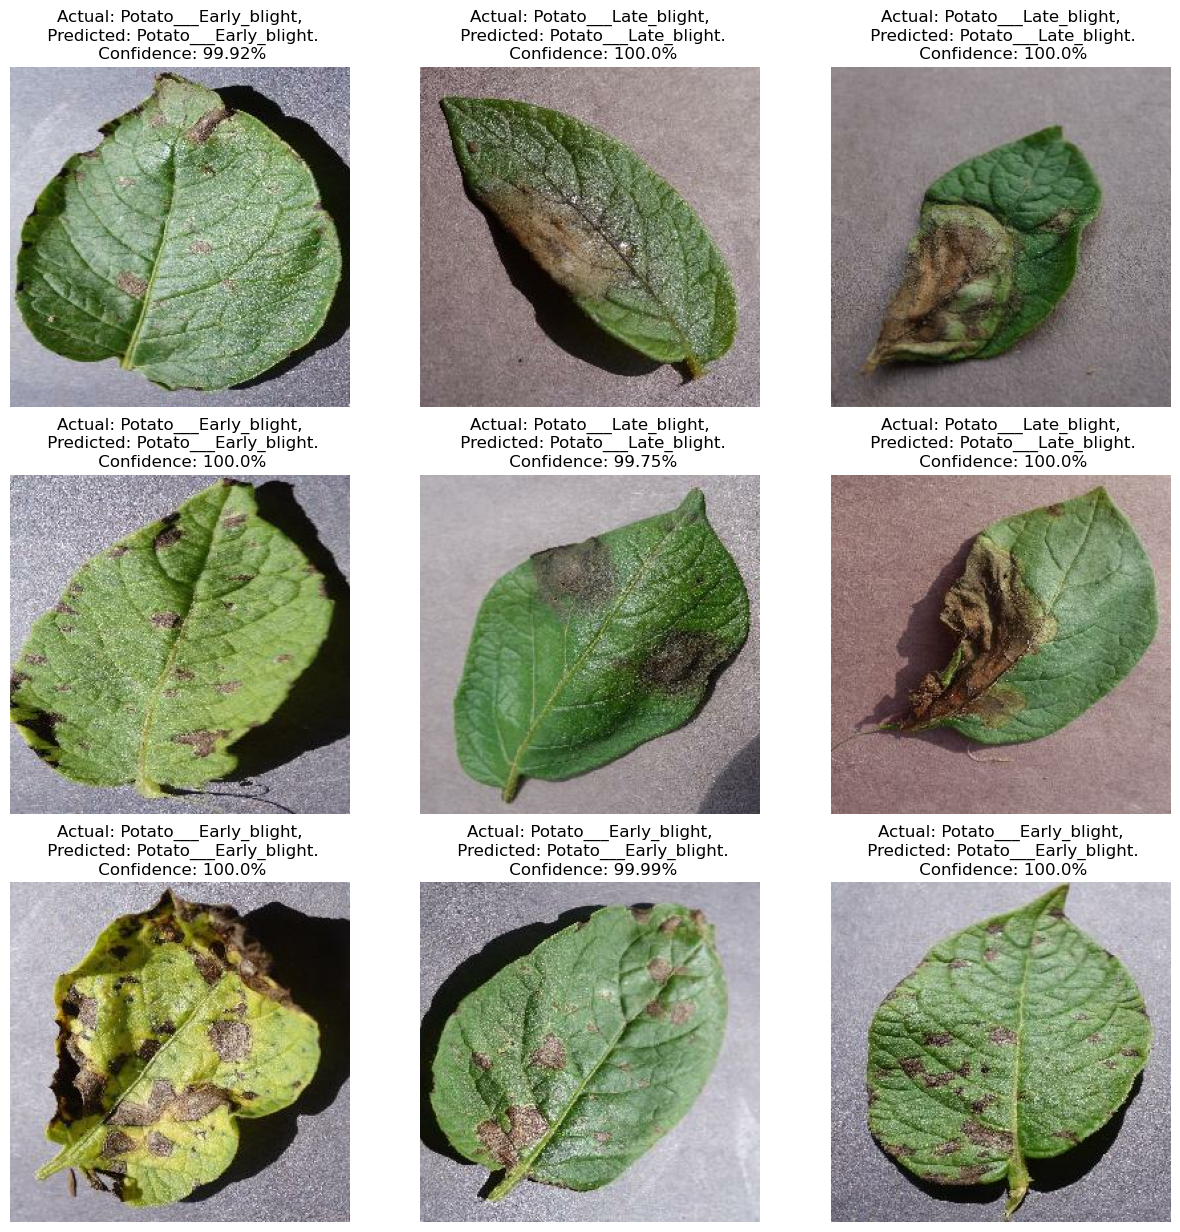

In [32]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [33]:
print(f"Model Accuracy: {score[1]}")

Model Accuracy: 0.97265625
